<a href="https://colab.research.google.com/github/GuilhermeDeAssis123/DataScience/blob/master/Machine_Learning_A_to_Z(section04_Simple_Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Previsão de salário utilizando regressão linear

> Todos nós queriamos saber qual o salário de uma vaga de emprego antes de se canditadar para a mesma. Será que isso é possível se nos basearmos em nossa experiência profissional no cargo, ou seja, em quantos anos exercemos a profissão? Para provar nossa hipótese vamos utilzar uma pequena base de dados criada por mim e treinar uma modelo de machine learning que possa prever o resultado. Com isso podemos verificar a acurácia do algoritmo e ver se a previsão condiz com a realizade. Vamos lá?

<center><img src="https://fdr.com.br/wp-content/uploads/2020/02/n_41904_e538ebf6aa9c832b718fb73d770c1245.jpg"/></center>

---

## 1. Importar os dados
> Nosso primeiro passo é importar os dados necessários para que possam ser feitas as análises. Os dados serão importados de um arquivo csv armazenado em meu github, lembrando que esses **dados são ficticios**, com o intuito de apenas provar um hipótese. Agora vamos analisar a cara do nosso DataSet.

In [38]:
# Importando as bibliotecas necessárias é o nosso dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/GuilhermeDeAssis123/DataScience/master/Dados/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# 2. Análise dos dados.
> Podemos ver que a base de dados não possui valores faltantes, o que nos mostra que ela esta quase pronta para gerar o nosso modelo. Mas para confirmar isso vamos dar uma olhada mais profunda nas estatísticas usando o método describe.


In [39]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


> Podemos análisar alguns fatores importantes aqui, são eles:
* **Media** e **Mediana**: Podemos ver que os valores da media e mediana são valores muito proximos nesse modelo, o que é um bom sinal de distribuição dos valores.
* **Desvio padrão**: Vemos também que o desvio padrão é cerca de 25% nas duas colunas, mostrando que os valores não se afastam muito da média. Outro bom fator de destribuição.
* **Quartis**: Analisando os quartis vemos que existe também uma distribuição dos valores em consquência da média e do desvio padrão.

> Levando em conta essa análise podemos dizer que não existem valores que causa discrepancia nos dados assim causando falsas conclusões(outliers). Com isso podemos concluir que os valores estão prontos para o modelo.

# 3. Preparação do dataset para o modelo.
> Antes de entrarmos de fato na modelagem de machine learnig, temos que preparar o nosso dataset, uma vez que precisamos de dataset de treino para treinar o modelo e o nosso dataset de teste para verificar se o modelo foi bem treinado. Uma vez que os dados ja estão preparados podemos dividir nosso dataset.


In [45]:
# Aqui vamos fazer uma copia do dataset para não mexermos no original.
df_copy =df.copy()
# Feito isso podemos dividi-lo em dois, para o treino e teste das variáveis independentes.
df_treino_x = df_copy.sample(frac = 0.8, random_state = 0)
df_teste_x = df_copy.drop(df_treino_x.index)
df_treino_x.sort_index(ascending=True)

,YearsExperience,Salary
1,1.3,46205.0
2,1.5,37731.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0
10,3.9,63218.0
11,4.0,55794.0


In [46]:
# Agora podemos separar nossa variável alvo do dataset, uma vez que separamos em X
# os valores do index em Y serão correspondentes em X.
df_treino_y = df_treino_x.pop('Salary')
df_teste_y = df_teste_x.pop('Salary')
df_treino_y.sort_index(ascending=True)

1      46205.0
2      37731.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
13     57081.0
14     61111.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
22    101302.0
23    113812.0
24    109431.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [44]:
# Vendo nosso dataset de treino.
# Vendo nosso dataset de treino, perceba que os incides tanto em X como Y são iguais.
# Agora a coluna Salary não faz mais parte de X, assim os conjuntos treino_x, teste_x, treino_y e teste_y
# estão prontos para o modelo de machine learning, assim o dataset está preparado.
df_treino_x.sort_index(ascending=True)
#df_teste_x.sort_index(ascending=True)

,YearsExperience
1,1.3
2,1.5
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7
10,3.9
11,4.0


# 4. Modelagem de machine learning( Regressão Linear Simples).
> Uma vez que os dataset original foi dividido em treino e teste, podemos agora treinar o modelo e fazer a previsão. Aqui vamos utiliazar a estratégia de regressão linear para poder treinar o modelo e em seguida após a análise gráfica vamos poder verificar nossa hipótese inicial.

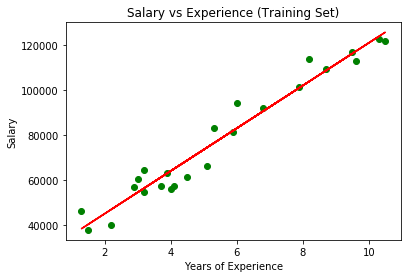

In [23]:
# Aqui vamos importar as bibliotecas para realizar o modelo.
from sklearn.linear_model import LinearRegression
# criação modelo.
Modelo_Regressão_Linear = LinearRegression()
#treinamento da modelo.
Modelo_Regressão_Linear.fit(df_treino_x, df_treino_y);
#Previsâo do modelo
Predição_y = Modelo_Regressão_Linear.predict(df_teste_x)

#plotando gráfico em relação dataset de treino
plt.scatter(df_treino_x,df_treino_y, color = 'green')
plt.plot (df_treino_x, Modelo_Regressão_Linear.predict(df_treino_x), color = 'red')
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


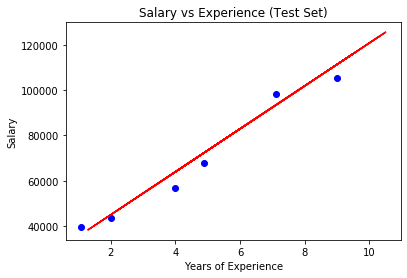

In [31]:
#plotando gráfico em relação dataset de treino.
plt.scatter(df_teste_x,df_teste_y, color = 'blue')
plt.plot (df_treino_x, Modelo_Regressão_Linear.predict(df_treino_x), color = 'red')
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# 5. Conclusão
> Analisando a predição sobre o dataset de treino nos mostra que o modelo conseguiu prever um valor aproximado em relação aos salários reais. Observe que os pontos verdes são os salários verdadeiros e a reta vermelha traçada são os salários previstos pelo modelo. Veja que a maioria dos pontos se aproximam muito da reta ou estão por cima da reta, o que indica um alto índice de acerto pelo modelo no seu treino.

> Já no segundo gráfico utilizamos o dataset de teste para verificar se o modelo foi bem treinado e aprendeu as correleções. De fato podemos concluir que sim, ele foi bem treinado, uma vez que pode prever com uma proximadade extremamente grande quando comparamos os salários reias(pontos azuis) e os salários previstos(reta vermelha). Mostrando que nossa hipótes inicial é verdadeira, ou seja, é possivel prever o seu salário de um vaga qualquer através do sua experiência com base em um modelo de machine learning.

> Para concluir recomenda-se uma análise mais detalhada do problema uma vez que os dados são ficticios e a amostra é pequena para que o resultado represente a realidade, esse relatório apenas mostra que a solução do problema é viavel.